In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import squidpy as sq

/Users/lukashat/miniforge3/envs/squidpy/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/lukashat/miniforge3/envs/squidpy/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/lukashat/miniforge3/envs/squidpy/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
adata = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_thresholds_scanorama.h5ad")
hue_order = ['MM_BD', 'MM_noBD', 'SMM', 'MGUS']

# Analyzing Ki67 cells

In [3]:
adata.obs['proliferating_cells'] =  adata.obs['Phenotype3'].astype(str) + '_' + adata.obs['Ki67_counts'].astype(str)
adata.obs

,Object,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,distance_to_bone,Phenotype,image_ID,...,cellcharter_CN,Ki67_counts,IDO_counts,GranzymeB_counts,GranzymeK_counts,CD68_counts,HLA-DR_counts,IRF4_counts,Phenotype4,proliferating_cells
Object 1 in TS-373_IMC77_B_001.csv,1,16,0.562500,801.750000,8.430760,2.420699,0.957893,26.019224,Unknown,TS-373_IMC77_B_001.csv,...,stroma_adipocyte,0,0,0,0,0,0,0,Plasma Cells/MM cells,Plasma Cells/MM cells_0
Object 2 in TS-373_IMC77_B_001.csv,2,12,0.833333,859.583333,5.176698,2.940449,0.823017,84.005952,Unknown,TS-373_IMC77_B_001.csv,...,bone,1,0,1,0,0,0,0,Unknown,Unknown_1
Object 3 in TS-373_IMC77_B_001.csv,3,13,0.846154,34.000000,5.203549,3.076923,0.806443,123.405835,Neutrophils,TS-373_IMC77_B_001.csv,...,hypoxic_immune,0,0,0,0,0,0,0,Neutrophils,Neutrophils_0
Object 4 in TS-373_IMC77_B_001.csv,4,9,1.000000,42.000000,3.265986,3.265986,0.000000,118.713942,Unknown,TS-373_IMC77_B_001.csv,...,stroma_adipocyte,0,0,0,0,0,0,0,Unknown,Unknown_0
Object 5 in TS-373_IMC77_B_001.csv,5,23,1.478261,57.565217,8.151264,3.901335,0.878024,110.476242,Unknown,TS-373_IMC77_B_001.csv,...,pc_myeloid,1,0,0,0,0,0,0,Unknown,Unknown_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Object 6622 in TS-373_IMC83_B_001.csv,6622,11,998.000000,883.545455,4.077022,3.677860,0.431538,250.503493,Neutrophils,TS-373_IMC83_B_001.csv,...,hypoxic_immune,1,1,1,1,1,0,0,Neutrophils,Neutrophils_1
Object 6623 in TS-373_IMC83_B_001.csv,6623,27,997.407407,978.703704,7.171071,5.069573,0.707266,327.273586,CD4+Tcells,TS-373_IMC83_B_001.csv,...,pc_myeloid,0,0,1,0,1,0,0,CD4+Tcells,CD4+Tcells_0
Object 6624 in TS-373_IMC83_B_001.csv,6624,25,997.640000,996.320000,7.554137,4.235920,0.827991,342.067245,Neutrophils,TS-373_IMC83_B_001.csv,...,bone_myeloid,1,0,1,0,1,0,0,Neutrophils,Neutrophils_1
Object 6625 in TS-373_IMC83_B_001.csv,6625,13,997.692308,820.153846,5.547002,3.412473,0.788377,195.256242,activated Macrophages/Monocytes,TS-373_IMC83_B_001.csv,...,pc_myeloid,1,0,1,1,1,1,0,activated Macrophages/Monocytes,activated Macrophages/Monocytes_1


## Just calculating the percentage per image

In [ ]:
freq = pd.crosstab(
    columns=adata.obs["proliferating_cells"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]],
    normalize="index",
)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "Phenotype3",
    value_name = "Frequency"
)

In [ ]:
plt.figure(figsize=(20, 8))

sns.boxplot(x='Phenotype3', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('Frequency per image', fontsize=10)
plt.ylim(0, 0.2)
plt.title('Phenotypes', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

## Calculating the fraction of a celltype proliferating or not per disease group. Can also do this for neighborhoods

In [ ]:
adata.obs

In [4]:
counts = pd.crosstab(
    columns=adata.obs["proliferating_cells"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
total = pd.crosstab(
    columns=adata.obs["Phenotype3"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
freq = counts.copy()
for col in freq.columns:
    freq[col] = freq[col] / total[col.split('_')[0]]
freq

,proliferating_cells,Adipocytes_0,Adipocytes_1,CD4+Tcells_0,CD4+Tcells_1,CD68+_0,CD68+_1,CD8+Tcells_0,CD8+Tcells_1,Dendritic Cells_0,Dendritic Cells_1,...,Osteoclasts_0,Osteoclasts_1,Osteocyte_0,Osteocyte_1,Plasma Cells/MM cells_0,Plasma Cells/MM cells_1,Unknown_0,Unknown_1,activated Macrophages/Monocytes_0,activated Macrophages/Monocytes_1
image_ID,disease2,,,,,,,,,,,,,,,,,,,,,
TS-373_IMC01_UB_001.csv,MM_noBD,0.606061,0.393939,0.762712,0.237288,0.374101,0.625899,0.612903,0.387097,0.636364,0.363636,...,NaN,NaN,0.801887,0.198113,0.773148,0.226852,0.084416,0.915584,0.410959,0.589041
TS-373_IMC01_UB_002.csv,MM_noBD,0.814815,0.185185,0.754386,0.245614,0.540670,0.459330,0.731429,0.268571,0.788820,0.211180,...,NaN,NaN,0.901639,0.098361,0.767647,0.232353,0.158933,0.841067,0.434343,0.565657
TS-373_IMC02_MGUS_001.csv,MGUS,0.365385,0.634615,0.712871,0.287129,0.280000,0.720000,0.629213,0.370787,0.688525,0.311475,...,NaN,NaN,NaN,NaN,0.655240,0.344760,0.071155,0.928845,0.358423,0.641577
TS-373_IMC02_MGUS_002.csv,MGUS,0.264151,0.735849,0.810127,0.189873,0.238411,0.761589,0.633987,0.366013,0.707317,0.292683,...,NaN,NaN,0.681672,0.318328,0.658647,0.341353,0.103113,0.896887,0.365546,0.634454
TS-373_IMC03_MGUS_001.csv,MGUS,0.711111,0.288889,0.637500,0.362500,0.260563,0.739437,0.627737,0.372263,0.523810,0.476190,...,NaN,NaN,0.714286,0.285714,0.796992,0.203008,0.173993,0.826007,0.298387,0.701613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TS-373_IMC93_B_002.csv,MM_BD,0.213235,0.786765,0.625000,0.375000,0.370787,0.629213,0.643333,0.356667,0.466667,0.533333,...,0.846154,0.153846,0.938776,0.061224,0.583232,0.416768,0.082121,0.917879,0.714286,0.285714
TS-373_IMC95_B_001.csv,MM_BD,0.902174,0.097826,0.733333,0.266667,0.441558,0.558442,0.947368,0.052632,0.500000,0.500000,...,NaN,NaN,1.000000,0.000000,0.843137,0.156863,0.632783,0.367217,0.594828,0.405172
TS-373_IMC95_B_002.csv,MM_BD,0.872340,0.127660,1.000000,0.000000,0.396226,0.603774,0.928571,0.071429,1.000000,0.000000,...,NaN,NaN,NaN,NaN,0.848684,0.151316,0.520883,0.479117,0.647059,0.352941


In [5]:
freq.drop(columns=[x for x in freq.columns if '0' in x], inplace=True)
freq

,proliferating_cells,Adipocytes_1,CD4+Tcells_1,CD68+_1,CD8+Tcells_1,Dendritic Cells_1,Endothelial cells_1,HSCs_1,MPO+_1,Macrophages/Monocytes_1,Neutrophils_1,Osteoblasts_1,Osteoclasts_1,Osteocyte_1,Plasma Cells/MM cells_1,Unknown_1,activated Macrophages/Monocytes_1
image_ID,disease2,,,,,,,,,,,,,,,,
TS-373_IMC01_UB_001.csv,MM_noBD,0.393939,0.237288,0.625899,0.387097,0.363636,0.260417,0.391667,0.731308,0.758974,0.688623,0.388889,NaN,0.198113,0.226852,0.915584,0.589041
TS-373_IMC01_UB_002.csv,MM_noBD,0.185185,0.245614,0.459330,0.268571,0.211180,0.265487,0.316239,0.700461,0.675676,0.631291,0.333333,NaN,0.098361,0.232353,0.841067,0.565657
TS-373_IMC02_MGUS_001.csv,MGUS,0.634615,0.287129,0.720000,0.370787,0.311475,0.450000,0.559322,0.712000,0.755319,0.535461,0.357143,NaN,NaN,0.344760,0.928845,0.641577
TS-373_IMC02_MGUS_002.csv,MGUS,0.735849,0.189873,0.761589,0.366013,0.292683,0.284091,0.354167,0.707386,0.884615,0.510451,0.285714,NaN,0.318328,0.341353,0.896887,0.634454
TS-373_IMC03_MGUS_001.csv,MGUS,0.288889,0.362500,0.739437,0.372263,0.476190,0.396226,0.505376,0.702586,0.703704,0.503682,0.407407,NaN,0.285714,0.203008,0.826007,0.701613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TS-373_IMC93_B_002.csv,MM_BD,0.786765,0.375000,0.629213,0.356667,0.533333,0.408840,0.561111,0.765734,0.696335,0.712944,0.324324,0.153846,0.061224,0.416768,0.917879,0.285714
TS-373_IMC95_B_001.csv,MM_BD,0.097826,0.266667,0.558442,0.052632,0.500000,0.194444,0.392857,0.432961,0.683398,0.451067,0.000000,NaN,0.000000,0.156863,0.367217,0.405172
TS-373_IMC95_B_002.csv,MM_BD,0.127660,0.000000,0.603774,0.071429,0.000000,0.307692,0.395833,0.532006,0.500000,0.421256,0.500000,NaN,NaN,0.151316,0.479117,0.352941


In [6]:
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "proliferating_cells",
    value_name = "Frequency"
)

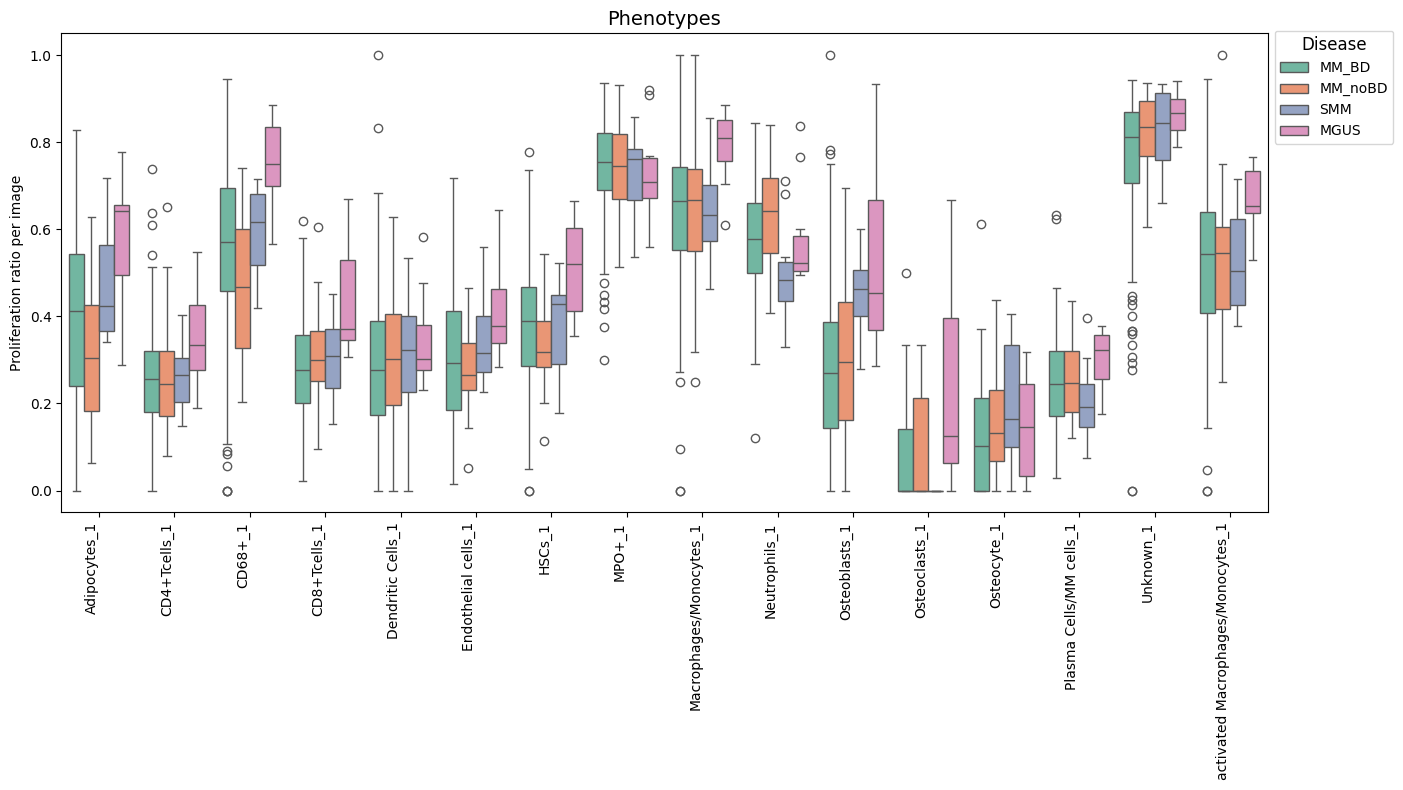

In [7]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='proliferating_cells', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('Proliferation ratio per image', fontsize=10)
plt.title('Phenotypes', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10, bbox_to_anchor=(1.11, 1.02))
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [ ]:
counts = pd.crosstab(
    columns=adata.obs["proliferating_cells"],
    index=[adata.obs["image_ID"], adata.obs["cellcharter_CN"]]
)
total = pd.crosstab(
    columns=adata.obs["Phenotype3"],
    index=[adata.obs["image_ID"], adata.obs["cellcharter_CN"]]
)
freq = counts.copy()
for col in freq.columns:
    freq[col] = freq[col] / total[col.split('_')[0]]
freq.drop(columns=[x for x in freq.columns if '0' in x], inplace=True)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "cellcharter_CN"],
    var_name = "proliferating_cells",
    value_name = "Frequency"
)
freq

In [ ]:
freq = freq[freq['proliferating_cells'] == 'Plasma Cells/MM cells_1']
freq

In [ ]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='proliferating_cells', y='Frequency', hue='cellcharter_CN', data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('Proliferation ratio per image', fontsize=10)
plt.title('Phenotypes', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10, bbox_to_anchor=(1.11, 1.02))
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

## For cellcharter neighborhoods

In [ ]:
adata.obs['proliferating_neighborhoods'] =  adata.obs['cellcharter_CN'].astype(str) + ':' + adata.obs['Ki67_counts'].astype(str)
adata.obs

In [ ]:
freq = pd.crosstab(
    columns=adata.obs["proliferating_neighborhoods"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]],
    normalize="index",
)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "cellcharter_CN",
    value_name = "Frequency"
)
plt.figure(figsize=(20, 8))

sns.boxplot(x='cellcharter_CN', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('Frequency per image', fontsize=10)
plt.ylim(0, 0.2)
plt.title('', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [ ]:
counts = pd.crosstab(
    columns=adata.obs["proliferating_neighborhoods"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
total = pd.crosstab(
    columns=adata.obs["cellcharter_CN"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
freq = counts.copy()
for col in freq.columns:
    freq[col] = freq[col] / total[col.split(':')[0]]
freq.drop(columns=[x for x in freq.columns if '0' in x], inplace=True)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "proliferating_neighborhoods",
    value_name = "Frequency"
)
plt.figure(figsize=(10, 6))

sns.boxplot(x='proliferating_neighborhoods', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('proliferation ratio per image', fontsize=10)
plt.title('', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# IDO

In [ ]:
adata.obs['IDO_cells'] =  adata.obs['Phenotype3'].astype(str) + '_' + adata.obs['IDO_counts'].astype(str)
adata.obs

In [ ]:
freq = pd.crosstab(
    columns=adata.obs["IDO_cells"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]],
    normalize="index",
)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "Phenotype3",
    value_name = "Frequency"
)
plt.figure(figsize=(20, 8))

sns.boxplot(x='Phenotype3', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('Frequency per image', fontsize=10)
plt.ylim(0, 0.2)
plt.title('Phenotypes', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [ ]:
counts = pd.crosstab(
    columns=adata.obs["IDO_cells"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
total = pd.crosstab(
    columns=adata.obs["Phenotype3"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
freq = counts.copy()
for col in freq.columns:
    freq[col] = freq[col] / total[col.split('_')[0]]
freq.drop(columns=[x for x in freq.columns if '0' in x], inplace=True)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "IDO_cells",
    value_name = "Frequency"
)
plt.figure(figsize=(14, 8))

sns.boxplot(x='IDO_cells', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('IDO ratio per image', fontsize=10)
plt.title('Phenotypes', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [ ]:
counts = pd.crosstab(
    columns=adata.obs["IDO_cells"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
total = pd.crosstab(
    columns=adata.obs["Phenotype3"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
freq = counts.copy()
for col in freq.columns:
    freq[col] = freq[col] / total[col.split('_')[0]]
freq.drop(columns=[x for x in freq.columns if '0' in x], inplace=True)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "IDO_cells",
    value_name = "Frequency"
)
plt.figure(figsize=(14, 8))

sns.boxplot(x='IDO_cells', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('IDO ratio per image', fontsize=10)
plt.title('Phenotypes', fontsize=14)
plt.ylim(0, 0.3)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

## IDO for neighborhoods

In [ ]:
adata.obs['IDO_neighborhoods'] =  adata.obs['cellcharter_CN'].astype(str) + ':' + adata.obs['IDO_counts'].astype(str)
adata.obs

In [ ]:
counts = pd.crosstab(
    columns=adata.obs["IDO_neighborhoods"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
total = pd.crosstab(
    columns=adata.obs["cellcharter_CN"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
freq = counts.copy()
for col in freq.columns:
    freq[col] = freq[col] / total[col.split(':')[0]]
freq.drop(columns=[x for x in freq.columns if '0' in x], inplace=True)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "IDO_neighborhoods",
    value_name = "Frequency"
)
plt.figure(figsize=(10, 6))

sns.boxplot(x='IDO_neighborhoods', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('proliferation ratio per image', fontsize=10)
plt.title('', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Granzyme K

In [ ]:
adata.obs['GranzymeK_cells'] =  adata.obs['Phenotype3'].astype(str) + '_' + adata.obs['GranzymeK_counts'].astype(str)
adata.obs

In [ ]:
freq = pd.crosstab(
    columns=adata.obs["GranzymeK_cells"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]],
    normalize="index",
)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "Phenotype3",
    value_name = "Frequency"
)
plt.figure(figsize=(20, 8))

sns.boxplot(x='Phenotype3', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('Frequency per image', fontsize=10)
plt.ylim(0, 0.2)
plt.title('Phenotypes', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [ ]:
counts = pd.crosstab(
    columns=adata.obs["GranzymeK_cells"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
total = pd.crosstab(
    columns=adata.obs["Phenotype3"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
freq = counts.copy()
for col in freq.columns:
    freq[col] = freq[col] / total[col.split('_')[0]]
freq.drop(columns=[x for x in freq.columns if '0' in x], inplace=True)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "GranzymeK_cells",
    value_name = "Frequency"
)
plt.figure(figsize=(14, 8))

sns.boxplot(x='GranzymeK_cells', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('GranzymeK ratio per image', fontsize=10)
plt.title('Phenotypes', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [ ]:
adata.obs

# Granzyme B

In [ ]:
adata.obs['GranzymeB_cells'] =  adata.obs['Phenotype3'].astype(str) + '_' + adata.obs['GranzymeB_counts'].astype(str)
adata.obs

In [ ]:
freq = pd.crosstab(
    columns=adata.obs["GranzymeB_cells"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]],
    normalize="index",
)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "Phenotype3",
    value_name = "Frequency"
)
plt.figure(figsize=(20, 8))

sns.boxplot(x='Phenotype3', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('Frequency per image', fontsize=10)
plt.ylim(0, 0.2)
plt.title('Phenotypes', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [ ]:
counts = pd.crosstab(
    columns=adata.obs["GranzymeB_cells"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
total = pd.crosstab(
    columns=adata.obs["Phenotype3"],
    index=[adata.obs["image_ID"], adata.obs["disease2"]]
)
freq = counts.copy()
for col in freq.columns:
    freq[col] = freq[col] / total[col.split('_')[0]]
freq.drop(columns=[x for x in freq.columns if '0' in x], inplace=True)
freq = freq.reset_index().melt(
    id_vars = ["image_ID", "disease2"],
    var_name = "GranzymeB_cells",
    value_name = "Frequency"
)
plt.figure(figsize=(14, 8))

sns.boxplot(x='GranzymeB_cells', y='Frequency', hue='disease2', hue_order=hue_order, data=freq, palette='Set2')

plt.xlabel('')
plt.ylabel('GranzymeB ratio per image', fontsize=10)
plt.title('Phenotypes', fontsize=14)
plt.legend(title='Disease', loc='upper right',title_fontsize=12, fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Proliferation indexratio depending on distance to bone

In [ ]:
df = adata[(adata.obs['Phenotype4'] == 'Plasma Cells/MM cells') & adata.obs['disease2'].isin(['MM_BD', 'MM_noBD'])].obs[['distance_to_bone_corrected', 'disease2', 'image_ID', 'proliferating_cells']]


In [ ]:
bins = list(range(0, 101, 10)) + list(range(250, 1001, 250))  # 0-100µM in 10µM steps, then 250µM steps
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], bins=bins)

# Calculate summary statistics
distance_bin_summary = df.groupby('distance_bin').apply(
    lambda x: pd.Series({
        'total_cells': len(x),
        'proliferating_cells': (x['proliferating_cells'] == 'Plasma Cells/MM cells_1').sum()
    })
)
distance_bin_summary['proliferating_ratio'] = (
    distance_bin_summary['proliferating_cells'] / distance_bin_summary['total_cells']
)
distance_bin_summary

In [ ]:
plt.figure(figsize=(10, 6))

# Convert bin intervals to midpoints for better line plot positioning
midpoints = [interval.mid for interval in distance_bin_summary.index]
labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in distance_bin_summary.index]

# Create line plot with markers
plt.plot(midpoints, distance_bin_summary['proliferating_ratio'], 
         marker='o', linestyle='--', color='#2c7bb6')

# Axis formatting
plt.xticks(midpoints, labels, rotation=90, ha='right')
plt.xlabel('Distance to Bone (µm)', fontsize=12)
plt.ylabel('Proliferation Ratio', fontsize=12)
plt.title('Plasma Cell Proliferation Ratio vs Distance to Bone', fontsize=14)
plt.ylim(0, 0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Filter for plasma cells and prepare the dataframe
df = adata[(adata.obs['Phenotype4'] == 'Plasma Cells/MM cells') & adata.obs['disease2'].isin(['MM_BD', 'MM_noBD'])].obs[['distance_to_bone_corrected', 'disease2', 'image_ID', 'proliferating_cells']]
bins = list(range(0, 101, 10)) + list(range(200, 1001, 100)) 
# Bin distances
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], bins=bins)

# Group by disease and distance bins
disease_distance_summary = df.groupby(['disease2', 'distance_bin']).apply(
    lambda x: pd.Series({
        'total_cells': len(x),
        'proliferating_cells': (x['proliferating_cells'] == 'Plasma Cells/MM cells_1').sum()
    })
)
disease_distance_summary['proliferating_ratio'] = disease_distance_summary['proliferating_cells'] / disease_distance_summary['total_cells']
disease_distance_summary

In [ ]:
# Create a line plot for each disease category
plt.figure(figsize=(10, 6))

# Get unique disease categories
disease_categories = df['disease2'].unique()

# Define a color palette for the different diseases
colors = [sns.color_palette('Set1')[1], sns.color_palette('Set1')[2]]

# Plot each disease category
for i, disease in enumerate(disease_categories):
    if disease in disease_distance_summary.index.get_level_values(0):
        # Get data for this disease
        disease_data = disease_distance_summary.loc[disease]
        
        # Convert bin intervals to midpoints
        midpoints = [interval.mid for interval in disease_data.index]
        
        # Plot line
        plt.plot(midpoints, disease_data['proliferating_ratio'], 
                marker='o', linestyle='-', color=colors[i % len(colors)], 
                label=f"{disease}")

# Format plot
plt.xlabel('Distance to Bone (µm)', fontsize=12)
plt.ylabel('Proliferation Ratio', fontsize=12)
plt.ylim(0, 0.3)
plt.title('Plasma Cell Proliferation Ratio by Disease and Distance to Bone', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(loc='lower right')

# Create custom x-tick labels that are more readable
midpoint_values = [interval.mid for interval in disease_distance_summary.index.get_level_values(1).unique()]
labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in disease_distance_summary.index.get_level_values(1).unique()]

# Set x-ticks at midpoints with custom labels
plt.xticks(midpoint_values, labels, rotation=90, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
sns.color_palette('Set1')[0]